## Recurrent Neural Networks

In [3]:
import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

### Build a simple model

In [4]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


### Outputs and states

In [5]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.GRU(256, return_sequences=True))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     128000      input_2[0][0]                    
______________________________________________________________________________________________

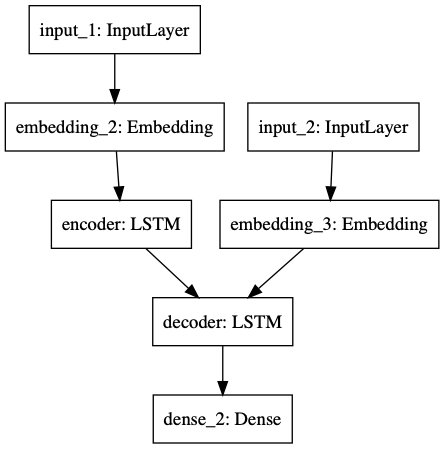

In [6]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None, ))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)
output, state_h, state_c = layers.LSTM(64, return_state=True, name='encoder')(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None, ))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)
decoder_output = layers.LSTM(64, name='decoder')(decoder_embedded, initial_state=encoder_state)
output = layers.Dense(10)(decoder_output)

model = tf.keras.Model([encoder_input, decoder_input], output)
model.summary()
tf.keras.utils.plot_model(model)

### RNN layers and RNN cells

tf.keras.layers.SimpleRNNCell corresponds to the SimpleRNN layer.

tf.keras.layers.GRUCell corresponds to the GRU layer.

tf.keras.layers.LSTMCell corresponds to the LSTM layer.

### Cross-batch statefulness

In [7]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True, return_state=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
o, h, c = lstm_layer(paragraph3)

lstm_layer.reset_states()

paragraph4 = np.random.random((20, 30, 50)).astype(np.float32)
lstm_layer = layers.LSTM(64, stateful=True, return_state=True)
o_, h_, c_ = lstm_layer(paragraph4)

### RNN State Reuse

In [8]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True, return_state=True)
new_lstm_layer = layers.LSTM(64)

In [9]:
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

In [10]:
output = lstm_layer(paragraph1)
o, h, c = lstm_layer(paragraph2)

new_output_1 = new_lstm_layer(paragraph3, initial_state=[h,c])

In [11]:
new_output

<tf.Tensor: shape=(20, 64), dtype=float32, numpy=
array([[-0.28906968, -0.01913461,  0.37342513, ...,  0.15640824,
        -0.20161729,  0.03486059],
       [-0.28973493, -0.08294324,  0.34565747, ...,  0.21270674,
        -0.08817371,  0.05880619],
       [-0.25829732, -0.08234002,  0.35833776, ...,  0.21703845,
        -0.10693611,  0.00313302],
       ...,
       [-0.3080642 , -0.04017993,  0.24255563, ...,  0.18988746,
        -0.06058322,  0.05175565],
       [-0.33526435,  0.00448553,  0.3147833 , ...,  0.2433946 ,
        -0.17133789,  0.01226721],
       [-0.3094606 , -0.08635696,  0.2529741 , ...,  0.22074085,
        -0.15110613, -0.0068563 ]], dtype=float32)>

In [12]:
new_output_1

<tf.Tensor: shape=(20, 64), dtype=float32, numpy=
array([[-0.2889365 , -0.02028294,  0.37337336, ...,  0.15639904,
        -0.20218316,  0.03487666],
       [-0.2895881 , -0.0839025 ,  0.3457123 , ...,  0.21261209,
        -0.08889092,  0.05873524],
       [-0.25814983, -0.0834329 ,  0.3583814 , ...,  0.2170352 ,
        -0.10757159,  0.00316023],
       ...,
       [-0.30798337, -0.04186666,  0.24254677, ...,  0.18976067,
        -0.06135723,  0.0517311 ],
       [-0.33512476,  0.00323826,  0.3148363 , ...,  0.24356407,
        -0.17191795,  0.01221254],
       [-0.3093366 , -0.08780551,  0.25292614, ...,  0.22077253,
        -0.15161218, -0.00685538]], dtype=float32)>

### Bidirectional RNNs

In [13]:
model = tf.keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = tf.keras.Sequential()

model.add(layers.LSTM(64, return_sequences=True, input_shape=(5, 10)))
model.add(layers.LSTM(32))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 64)             19200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 31,946
Trainable params: 31,946
Non-trainable params: 0
_________________________________________________________________


### Performance optimization and CuDNN kernels in TensorFlow 2.0

In [15]:
batch_size = 64
input_dim = 28

units = 64
output_size = 10


# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = tf.keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(units),
                                         input_shape=(None, input_dim))
    model = tf.keras.models.Sequential([
        lstm_layer,
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(output_size)
    ])
    return model

In [16]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

In [17]:
model = build_model(allow_cudnn_kernel=True)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='sgd',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.9899 - accuracy: 0.6843 - val_loss: 0.7063 - val_accuracy: 0.7625
Epoch 2/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.4145 - accuracy: 0.8749 - val_loss: 0.3410 - val_accuracy: 0.8930
Epoch 3/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2711 - accuracy: 0.9193 - val_loss: 0.3764 - val_accuracy: 0.8824
Epoch 4/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2075 - accuracy: 0.9383 - val_loss: 0.3270 - val_accuracy: 0.8899
Epoch 5/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.1761 - accuracy: 0.9462 - val_loss: 0.2253 - val_accuracy: 0.9231


In [19]:
slow_model = build_model(allow_cudnn_kernel=False)
slow_model.set_weights(model.get_weights())
slow_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   optimizer='sgd', 
                   metrics=['accuracy'])
slow_model.fit(x_train, y_train, 
               validation_data=(x_test, y_test), 
               batch_size=batch_size,
               epochs=1)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 14s 228us/sample - loss: 0.1521 - accuracy: 0.9536 - val_loss: 0.1483 - val_accuracy: 0.9522


<strong>The model will run on CPU by default if no GPU is available.</strong>

Predicted result is: [5], target result is: 5


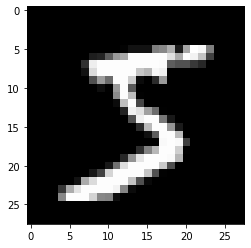

In [20]:
with tf.device('CPU:0'):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)),
                       axis=1)
    print('Predicted result is: %s, target result is: %s' %
          (result.numpy(), sample_label))
    plt.imshow(sample, cmap=plt.get_cmap('gray'))

### RNNs with list/dict inputs, or nested inputs

In [33]:
class NestedCell(tf.keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3

        self.state_size = [
            tf.TensorShape([unit_1]),
            tf.TensorShape([unit_2, unit_3])
        ]

        self.output_size = [
            tf.TensorShape([unit_1]),
            tf.TensorShape([unit_2, unit_3])
        ]

        super(NestedCell, self).__init__(**kwargs)

    def build(self, input_shapes):
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]

        self.kernel_1 = self.add_weight(shape=(i1, self.unit_1),
                                        initializer='uniform',
                                        name='kernel_1')

        self.kernel_2_3 = self.add_weight(shape=(i2, i3, self.unit_2,
                                                 self.unit_3),
                                          initializer='uniform',
                                          name='kernel_2_3')

    def call(self, inputs, states):
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states

        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum('bij,ijkl->bkl', input_2, self.kernel_2_3)

        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3

        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)

        return output, new_states

    def get_config(self):
        return {'unit_1': self.unit_1, 'unit_2': unit_2, 'unit_3': self.unit_3}

In [34]:
unit_1 = 10
unit_2 = 20
unit_3 = 30

i1 = 32
i2 = 64
i3 = 32

batch_size = 64
num_batches = 100

timestep = 50

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, None, 32)]   0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, None, 64, 32 0                                            
__________________________________________________________________________________________________
rnn_7 (RNN)                     ((None, 10), (None,  1229120     input_17[0][0]                   
                                                                 input_18[0][0]                   
Total params: 1,229,120
Trainable params: 1,229,120
Non-trainable params: 0
__________________________________________________________________________________________________


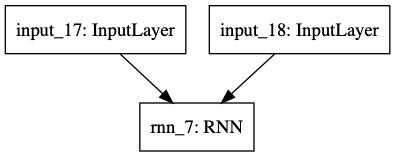

In [47]:
cell = NestedCell(unit_1, unit_2, unit_3)
rnn = tf.keras.layers.RNN(cell)

input_1 = tf.keras.Input((None, i1))
input_2 = tf.keras.Input((None, i2, i3))

outputs = rnn((input_1, input_2))

model = tf.keras.models.Model([input_1, input_2], outputs)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model)

In [48]:
input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
target_1_data = np.random.random((batch_size * num_batches, unit_1))
target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))

input_data = [input_1_data, input_2_data]
target_data = [target_1_data, target_2_data]

In [50]:
model.fit(input_data, target_data, batch_size=batch_size, epochs=3)

Train on 6400 samples
Epoch 1/3
6400/6400 [==============================] - 26s 4ms/sample - loss: 0.2898 - rnn_7_loss: 0.0885 - rnn_7_1_loss: 0.2014 - rnn_7_accuracy: 0.1002 - rnn_7_1_accuracy: 0.0353
Epoch 2/3
6400/6400 [==============================] - 26s 4ms/sample - loss: 0.2620 - rnn_7_loss: 0.0880 - rnn_7_1_loss: 0.1740 - rnn_7_accuracy: 0.1019 - rnn_7_1_accuracy: 0.0383
Epoch 3/3
6400/6400 [==============================] - 28s 4ms/sample - loss: 0.2383 - rnn_7_loss: 0.0875 - rnn_7_1_loss: 0.1508 - rnn_7_accuracy: 0.1011 - rnn_7_1_accuracy: 0.0424
